In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#loading the Dataset
df=pd.read_csv(r'C:\Users\iamha\Downloads\house.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
df1 =df.loc[:,['GrLivArea', 'YearBuilt', 'SalePrice']]
df1.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [17]:
df1.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [19]:
df1.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

In [20]:
df1.corr()[['SalePrice']]

,SalePrice
GrLivArea,0.708624
YearBuilt,0.522897
SalePrice,1.000000


C:\Users\iamha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


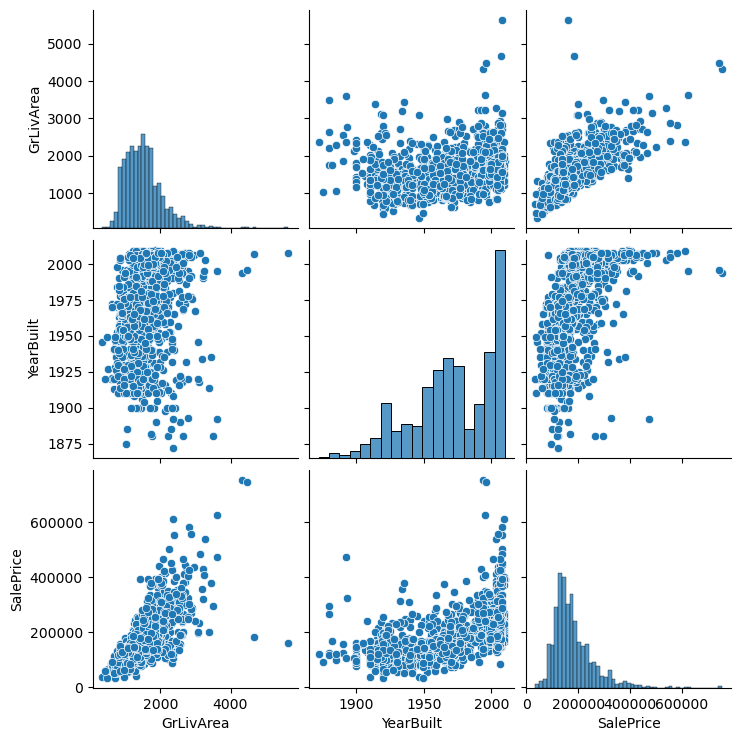

In [21]:
sns.pairplot(df1)

In [23]:
#Split the Data
X=df1.loc[:,['GrLivArea', 'YearBuilt']]
X.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [25]:
Y=df1.loc[:,['SalePrice']]
Y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [26]:
Y.ndim

2

In [28]:
#PROBLEM 2 PREPROCESSING
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.20)
X_train.shape, X_test.shape

((1168, 2), (292, 2))

In [30]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [ ]:
#PROBLEM 3

In [31]:
#training and Estimation
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train, Y_train)
y_linear_pred =lreg.predict(X_test)



In [37]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test, y_linear_pred)
print(mse)


3048239328.143732


In [33]:
lreg.score(X_test, Y_test)

0.4563594378283464

In [38]:
from sklearn.metrics import r2_score
print('R-squared of the fit: ', r2_score(Y_test, y_linear_pred))

R-squared of the fit:  0.4563594378283464


In [39]:
print('The intercept and slope coefficients that define the model:')
print(lreg.intercept_)
print(lreg.coef_)

The intercept and slope coefficients that define the model:
[-2061371.63325026]
[[ 101.99383475 1059.5308351 ]]


In [40]:
X_test

,GrLivArea,YearBuilt
788,901,1954
326,1719,1993
26,900,1951
1323,708,1940
840,1482,1925
...,...,...
818,1052,1971
444,1908,1994
708,1456,2007
346,958,1960


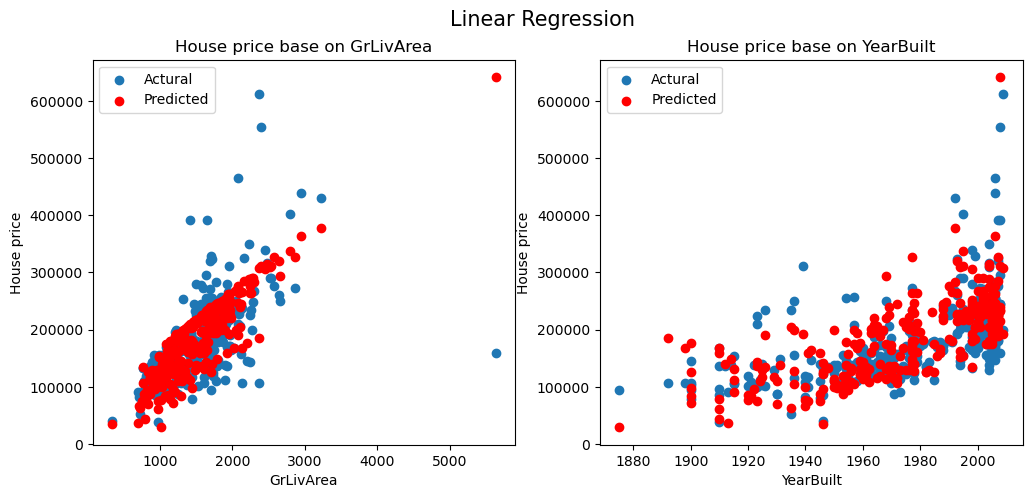

In [45]:
def visualization(ypred, title):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    ax1.scatter(X_test.loc[:, 'GrLivArea'], Y_test)
    ax1.scatter(X_test.loc[:, 'GrLivArea'], ypred, c='red')
    classes = ['Actural', 'Predicted']
    ax1.legend(labels =classes)
    ax1.set(title='House price base on GrLivArea', xlabel='GrLivArea', ylabel='House price')
    
    ax2.scatter(X_test.loc[:, 'YearBuilt'], Y_test)
    ax2.scatter(X_test.loc[:, 'YearBuilt'], ypred, c='red')
    classes = ['Actural', 'Predicted']
    ax2.legend(labels =classes)
    ax2.set(title='House price base on YearBuilt', xlabel='YearBuilt', ylabel='House price')
    
    fig.suptitle(title, fontsize=15)
visualization(y_linear_pred, "Linear Regression")
    

In [41]:
#PROBLEM 3
#SVM
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, Y_train)
y_svr_pred = svr_reg.predict(X_test)

C:\Users\iamha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
svr_mse = mean_squared_error(Y_test, y_svr_pred)
print(svr_mse)

5907299348.281572


In [61]:
print('R-Squared of SVR:', r2_score(Y_test,y_svr_pred))

R-Squared of SVR: -0.053541796723583834


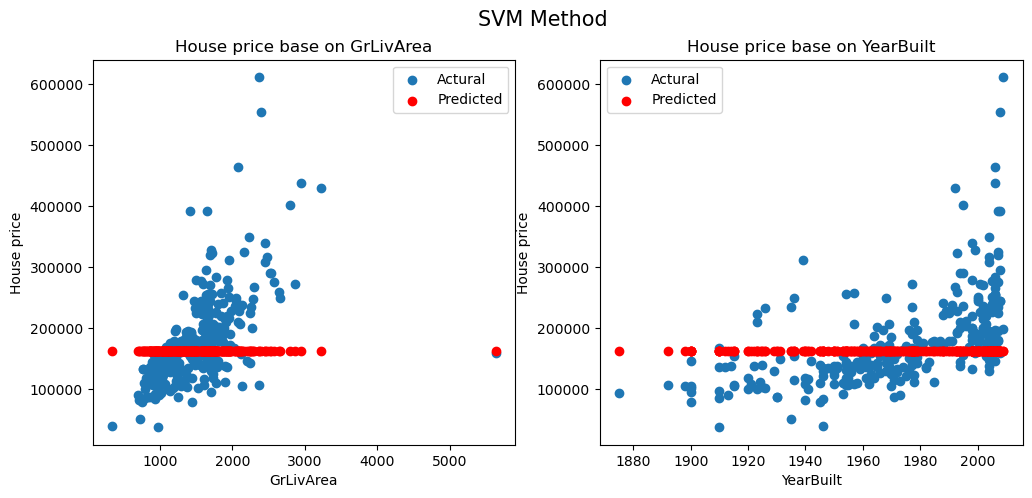

In [46]:
visualization(y_svr_pred, "SVM Method")

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(X_train,Y_train)
y_rf_pred=rf_reg.predict(X_test)

C:\Users\iamha\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [51]:
rf_mse = mean_squared_error(Y_test, y_rf_pred)
print(rf_mse)

1723131867.1254106


In [60]:
print('R-Squared of Random Forest:', r2_score(Y_test,y_rf_pred))

R-Squared of Random Forest: 0.6926867361460083


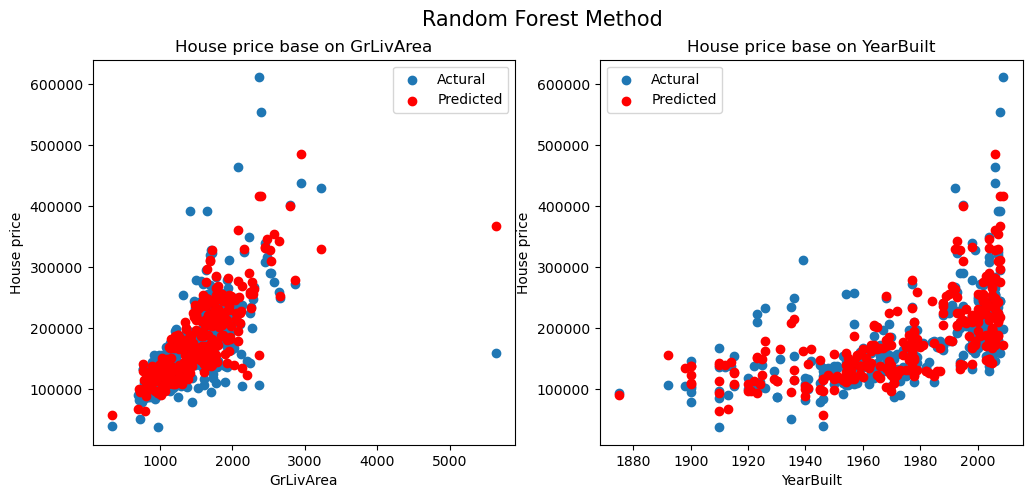

In [52]:
visualization(y_rf_pred, 'Random Forest Method')

In [54]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
dt_reg =DecisionTreeRegressor()
dt_reg.fit(X_train, Y_train)
y_dt_pred = dt_reg.predict(X_test)

In [56]:
dt_mse = mean_squared_error(Y_test, y_dt_pred)
print(dt_mse)

3131836019.5355783


In [59]:
print('R-Squared of Decision Tree:', r2_score(Y_test,y_dt_pred))

R-Squared of Decision Tree: 0.4414503222991438


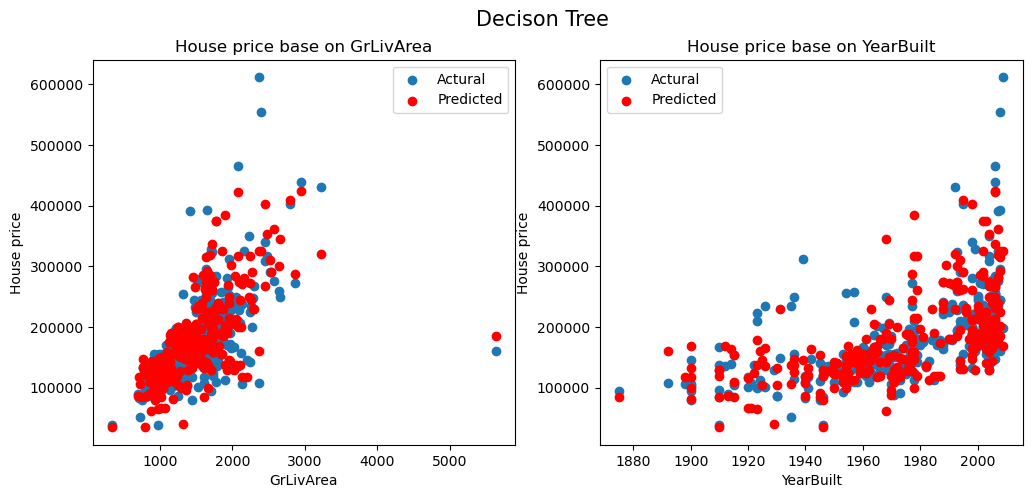

In [57]:
visualization(y_dt_pred, 'Decison Tree')